In [1]:
# 경고(warning) 문구를 화면에 출력하지 않게 하기 위해서 아래 코드를 사용합니다. 
import warnings
warnings.filterwarnings('ignore')

아래와 같이 텍스트 파일을 읽어 옵니다.

In [2]:
import numpy as np
from os import listdir
from os.path import isfile, join

mypath = './example_En_docs/'
onlyfiles = [f for f in listdir(mypath) if isfile(join(mypath, f))]
onlyfiles.sort()

total_docs = []
for file in onlyfiles:
    file_path = mypath+file
    with open(file_path, 'r', encoding='utf8') as f:
        content = f.read()
    total_docs.append(content)

In [3]:
import preprocessing # import a python file for English text preprocessing

In [4]:
stopwords = ['be', 'today', 'yesterday', 'tomorrow'] # 불용어 사전 생성하기

In [5]:
docs_nouns = [preprocessing.En_preprocessing(doc, stopwords) for doc in total_docs]

In [6]:
documents_filtered = [' '.join(doc) for doc in docs_nouns] # list of docs, doc 은 단어들로 구성이 된 string data
# 불필요한 단어들을 제거하고 난후 DTM로 변환하기 위해 다시 list of strings의 형태로 변환

In [7]:
from sklearn.feature_extraction.text import CountVectorizer # frequency based DTM
from sklearn.feature_extraction.text import TfidfVectorizer # tf-idf based DTM

In [8]:
tf_vectorizer = CountVectorizer()
DTM_tf = tf_vectorizer.fit_transform(documents_filtered)
DTM_TF = np.array(DTM_tf.todense())

In [9]:
tfidf_vectorizer = TfidfVectorizer()
DTM_tfidf = tfidf_vectorizer.fit_transform(documents_filtered)
DTM_TFIDF = np.array(DTM_tfidf.todense())

# 위계적 군집 분석

In [10]:
from sklearn.cluster import AgglomerativeClustering

In [11]:
agg = AgglomerativeClustering(linkage='average', affinity='cosine', n_clusters=5)

In [13]:
clusters = agg.fit_predict(DTM_TFIDF)

In [14]:
clusters

array([1, 1, 1, 4, 4, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2], dtype=int64)

In [15]:
agg_ward = AgglomerativeClustering(linkage='ward', n_clusters=5)

In [16]:
clusters_ward = agg_ward.fit_predict(DTM_TFIDF)
clusters_ward

array([1, 1, 1, 4, 4, 3, 3, 3, 0, 0, 0, 0, 2, 2, 2], dtype=int64)

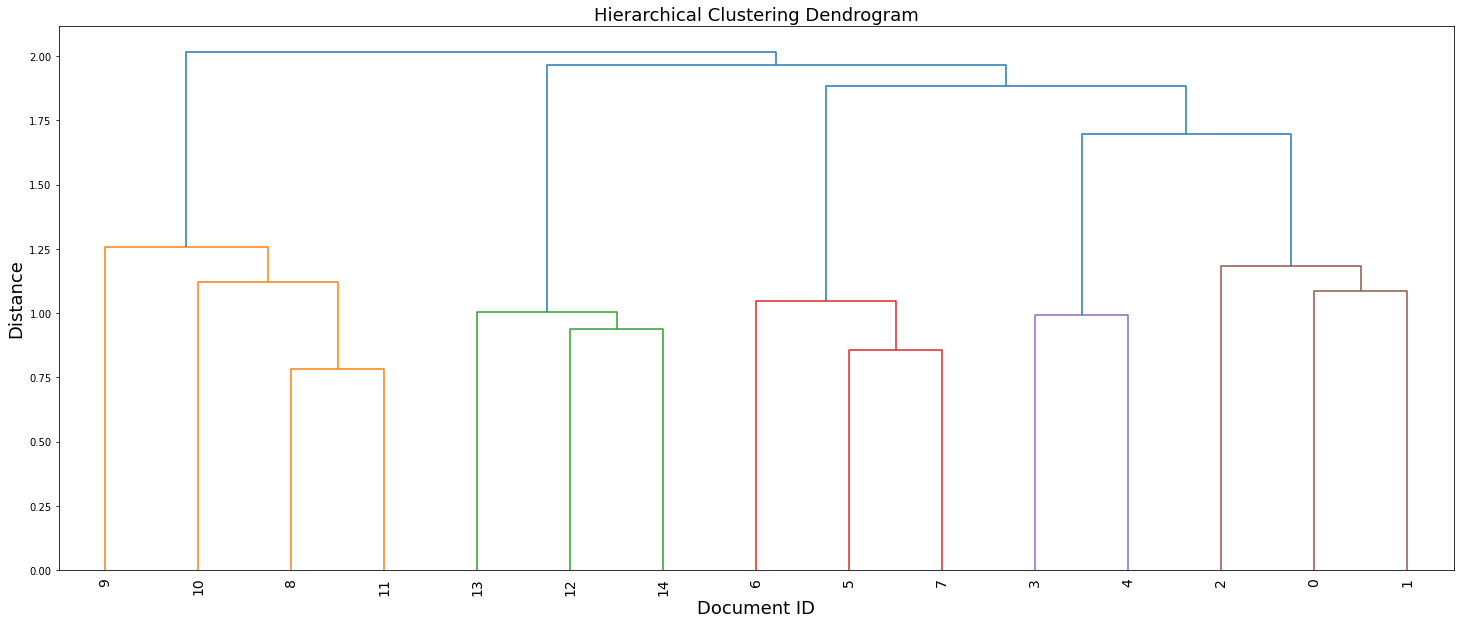

In [17]:
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
np.set_printoptions(precision=5, suppress=True)
Z = linkage(DTM_TFIDF, 'ward')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram', fontsize=18)
plt.xlabel('Document ID', fontsize=18)
plt.ylabel('Distance', fontsize=18)
dendrogram(
    Z,
    leaf_rotation=90.,  # rotates the x axis labels
    leaf_font_size=14.,  # font size for the x axis labels
)
plt.show()